# USPA submaster lifters
This page uses data from the OpenPowerlifting project, https://www.openpowerlifting.org. <br>
You may download a copy of the data at https://gitlab.com/openpowerlifting/opl-data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

#### Load the data

In [2]:
data_types = {'Name': str,
              'Sex': str,
              'Age': float,
              'Division': str,
              'Event': str,
              'Federation': str,
              'Date': str,
              'MeetName': str}

columns = ['Name',
           'Sex',
           'Age',
           'Division',
           'Event',
           'Federation',
           'Date',
           'MeetName']

In [3]:
op = pd.read_csv('openpowerlifting-2020-01-30.csv', usecols=columns, dtype=data_types)

In [4]:
# add a year column
op['Year'] = op['Date'].str[0:4].astype(int)

#### Analyze the data

In [5]:
## filter the data to full-power USPA lifters aged 35 to 39 between 2011 and 2019 (not including LW, MW, and HW divisions)
## U.S. IPL meets are not included
mask = ((op['Federation'] == 'USPA')
         & (op['Event'] == 'SBD')
         & (op['Age'].between(35, 39))
         & (op['Division'].isin(['Open', 'Submasters 35-39'])) 
         & (op['Year'].isin(range(2011, 2020))))
uspa3539 = op[mask]

In [6]:
## find whether a lifter signed up for Open, Submasters 35-39, or both
## grouping by name and date is sufficient to identify unique lifters
## use head(1) to avoid unusual combinations like 'Open + Open'
uspa3539_no_duplicates = uspa3539.sort_values('Division').groupby(['Year', 'Name', 'Date', 'Division']).head(1)
concat_division = uspa3539_no_duplicates.groupby(['Year', 'Name', 'Date'])['Division'].apply(' + '.join).reset_index()

In [7]:
# by year, how many lifters signed up for Open, Submasters 35-39, or both
chart_source = concat_division.groupby('Year')['Division'].value_counts().unstack().reset_index()
chart_source

Division,Year,Open,Open + Submasters 35-39,Submasters 35-39
0,2011,15,7,9
1,2012,39,36,33
2,2013,46,92,80
3,2014,122,140,158
4,2015,159,139,209
5,2016,218,198,422
6,2017,263,317,505
7,2018,353,462,497
8,2019,398,639,609


In [8]:
## normalize those values so that we can produce a 100% stacked area chart
cols = ['Open', 'Open + Submasters 35-39', 'Submasters 35-39']
chart_source[cols] = chart_source[cols].div(chart_source[cols].sum(axis=1), axis=0)
chart_source

Division,Year,Open,Open + Submasters 35-39,Submasters 35-39
0,2011,0.483871,0.225806,0.290323
1,2012,0.361111,0.333333,0.305556
2,2013,0.211009,0.422018,0.366972
3,2014,0.290476,0.333333,0.376190
4,2015,0.313609,0.274162,0.412229
5,2016,0.260143,0.236277,0.503580
6,2017,0.242396,0.292166,0.465438
7,2018,0.269055,0.352134,0.378811
8,2019,0.241798,0.388214,0.369988


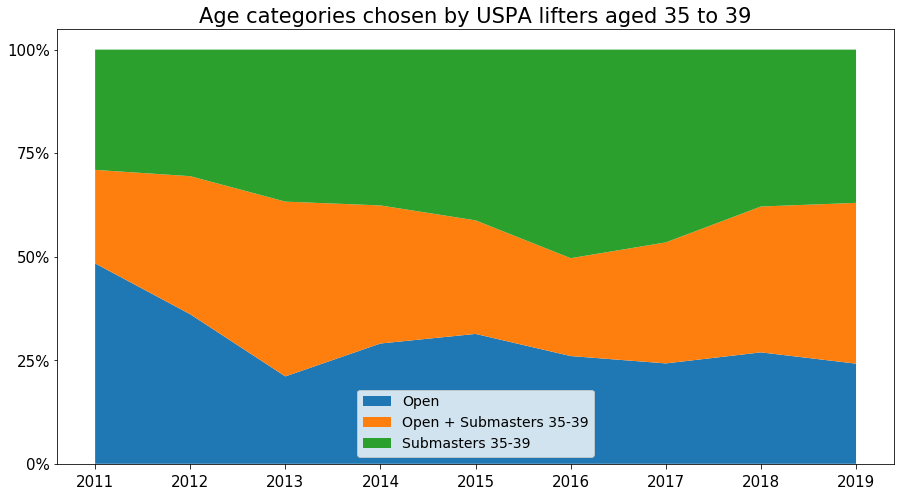

In [9]:
# visualize the results
fig, ax = plt.subplots(figsize=(15, 8))

x = chart_source['Year']
y1 = chart_source['Open']
y2 = chart_source['Open + Submasters 35-39']
y3 = chart_source['Submasters 35-39']
labels = ['Open', 'Open + Submasters 35-39', 'Submasters 35-39']

ax.stackplot(x, y1, y2, y3, labels=labels)

plt.title('Age categories chosen by USPA lifters aged 35 to 39', size=21)
plt.legend(loc='lower center', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=15, pad=6, length=5)
plt.yticks([0, 0.25, 0.5, 0.75, 1], size=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))

plt.show()